# Les régressions linéaires avec Python

Présentation (non-exhaustive) des méthodes permettant d'implémenter une régression linéaire avec Python [Article avec toutes les méthodes et leur comparaison en temps d'exécution](https://www.freecodecamp.org/news/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b/).

Les points fondamentaux de toute modélisation :
> 1. les données
> 2. le modèle
> 3. la fonction de coût
> 4. l'optimisation
> 5. l'évaluation

## Régression linéaire simple

### Le dataset

In [1]:
# Import des librairies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import du dataset salaires ou génération des données aléatoirement avec sklearn

#dataset = np.genfromtxt('Régression linéaire simple/salaires.csv', delimiter = ',', skip_header=True)
#x = dataset[:,:-1]
#y = dataset[:,-1:]

#possibilité de générer des données aléatoirement avec sklearn
from sklearn.datasets import make_regression
x, y= make_regression(n_samples = 100, n_features = 1, noise = 10)
print(x.shape,y.shape)

(100, 1) (100,)


In [3]:
# on modifie y.shape pour avoir y.shape[1]=1
y = y.reshape(y.shape[0],1)
y.shape

(100, 1)

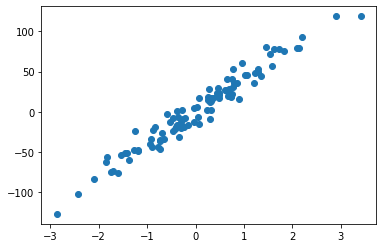

In [4]:
# Visualisation de nos données
plt.scatter(x,y)

### Avec scikit-learn

In [5]:
# Construction du modèle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
results = model.fit(x,y) #x,y tableaux de dimensions 2

In [6]:
# Évaluation du modèle
model.score(x,y)

0.9533247674030203

In [8]:
# Récupération des coefficients
print(results.intercept_, results.coef_)

[0.73707549] [[39.98566499]]


array([0.73707549])

In [ ]:
# Nouvelles prédictions
model.predict([[-3],[16],[25]]) #exemples de valeurs au format 2D-array

In [ ]:
# Visualisation
plt.scatter(x,y)
plt.plot(x,model.predict(x),c='red')

### Avec statsmodel

In [ ]:
#Construction du modèle
from statsmodels.api import OLS, add_constant
X = add_constant(x) # pour ajouter une constante à notre modèle sinon il n'y en a pas par défaut
model2 = OLS(y, X)
results2 = model2.fit()

In [ ]:
# Évaluation du modèle
results2.summary()

In [ ]:
# Récupération des coefficients
results2.rsquared
results2.params

In [ ]:
# Nouvelles prédictions
results2.predict([[1,-3],[1,16],[1,25]])

### Avec le module stats de scipy

In [ ]:
# stats.linregress(x,y) renvoie un quintuplet :
# la pente
# l'ordonnée à l'origine (= la constante)
# le coef de corrélation (pour la régression linéaire, R² est le carré de cette valeur)
# la p-value
# l'erreur standard de l'estimation du gradient

# stats.linregress prend en paramètres des array de dimension 1 donc il faut faire un reshape !!
x = x.reshape((x.shape[0],))
y = y.reshape((y.shape[0],))

In [ ]:
#Construction du modèle
from scipy import stats
model3 = stats.linregress(x,y)
model3

In [ ]:
# Évaluation du modèle
model3.rvalue**2

In [ ]:
# Récupération des coefficients
print(model3.slope, model3.intercept, model3.rvalue)

In [ ]:
# Nouvelles prédictions
def predict(x):
    return model3.slope * x + model3.intercept

list(map(predict,[-3,16,25]))

### Avec la fonction numpy polyfit

In [ ]:
# Cette fonction fait une régression polynomiale de degré 1 et renvoie les coefficients
# les coefs sont donnés dans l'ordre décroissant des puissances donc pour une régression linéaire :
# d'abord le coefficient du x puis la constante
# Comme stats.linregress, np.polyfit prend en paramètres des array de dimension 1 donc il faut faire un reshape !
x = x.reshape((x.shape[0],))
y = y.reshape((y.shape[0],))

In [ ]:
# Construction du modèle et récupération des coefficients
model4 = np.polyfit(x,y,1)
model4

In [ ]:
# Nouvelles prédictions
poly = np.poly1d(model4) #renvoie la fonction polynôme associée
poly([-3,16,25]) #donne les prédictions pour 2 et -2 par exemple